In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

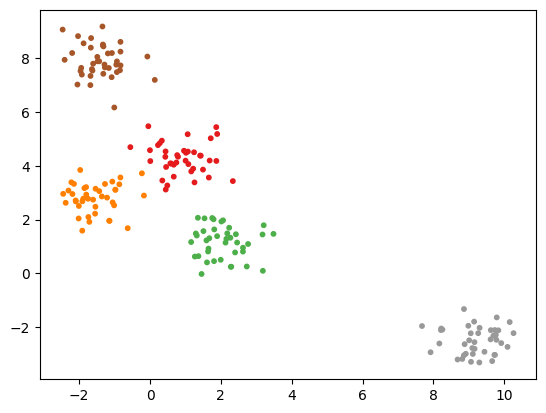

In [46]:
from sklearn.datasets import make_blobs

X, y = make_blobs(
    n_samples=200, 
	n_features=2, 
	centers=5, 
	cluster_std=0.6, 
	random_state=0
)
plt.scatter(X[:, 0], X[:, 1], s=10, c=y, cmap="Set1")
plt.show()

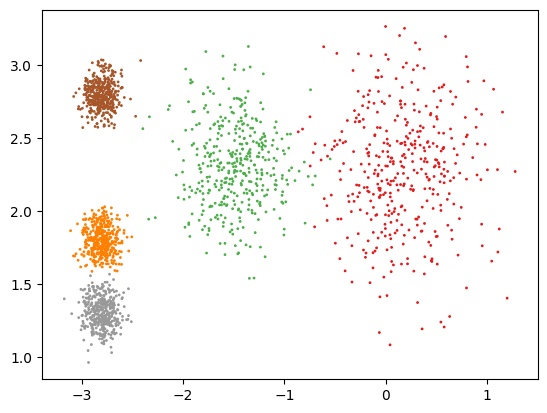

In [82]:
from sklearn.datasets import make_blobs

blob_centers =np.array([
    [ 0.2,  2.3], 
	[-1.5,  2.3], 
	[-2.8,  1.8],
	[-2.8,  2.8], 
	[-2.8,  1.3]
])
blob_std = np.array(
    [0.4, 0.3, 0.1, 0.1, 0.1]
)

X, y = make_blobs(
    n_samples=2000, 
	n_features=2, 
	centers=blob_centers, 
	cluster_std=blob_std, 
	random_state=0
)
plt.scatter(X[:, 0], X[:, 1], s=1, c=y, cmap="Set1")
plt.show()

# initialize centroids

[[ 0.13693319  3.2026894 ]
 [-2.64762288  2.79427188]
 [-2.86620243  1.22530837]
 [-1.78714424  1.8954727 ]
 [-2.82562327  1.88576619]]


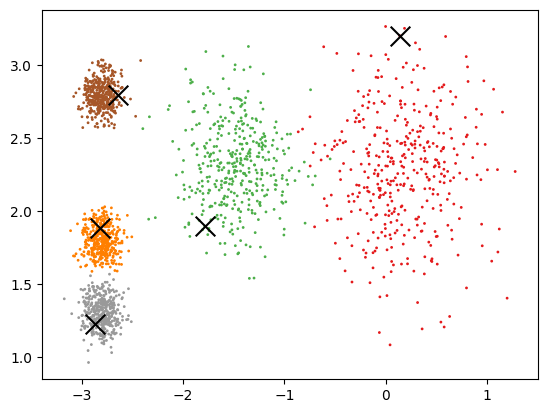

In [165]:
K = 5

rng = np.random.default_rng(seed=122) 
centroids = rng.choice(X, K, replace=False, axis=0)
print(centroids)

plt.scatter(X[:, 0], X[:, 1], s=1, c=y, cmap="Set1")
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, marker="x", color="black")
plt.show()

In [171]:
def initialize_centroids(X, K):
	rng = np.random.default_rng(seed=122) 
	centroids = rng.choice(X, K, replace=False, axis=0)
	return centroids
initialize_centroids(X, K)

array([[ 0.13693319,  3.2026894 ],
       [-2.64762288,  2.79427188],
       [-2.86620243,  1.22530837],
       [-1.78714424,  1.8954727 ],
       [-2.82562327,  1.88576619]])

# assign clusters

In [166]:
from sklearn.metrics import pairwise_distances, pairwise_distances_argmin
# pairwise_distances(X,centroids)
pairwise_distances_argmin(X,centroids)

array([0, 4, 4, ..., 0, 0, 3], shape=(2000,))

[0 4 4 ... 0 0 3]


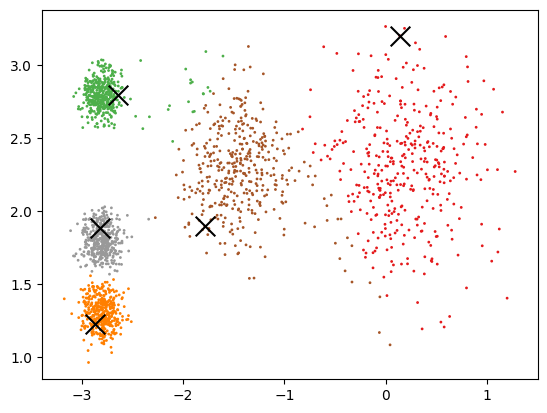

In [167]:
labels = pairwise_distances_argmin(X,centroids)
print(labels)
plt.scatter(X[:, 0], X[:, 1], s=1, c=labels, cmap="Set1")
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, marker="x", color="black")
plt.show()

In [172]:
def assign_clusters(X, centroids):
	labels = pairwise_distances_argmin(X,centroids)
	return labels
assign_clusters(X, centroids)

array([0, 4, 4, ..., 0, 0, 3], shape=(2000,))

# update centroids

In [149]:
new_cluster_points = X[labels == 0]
new_centroid = new_cluster_points.mean(axis=0)
print(new_centroid)

[0.18931119 2.30267517]


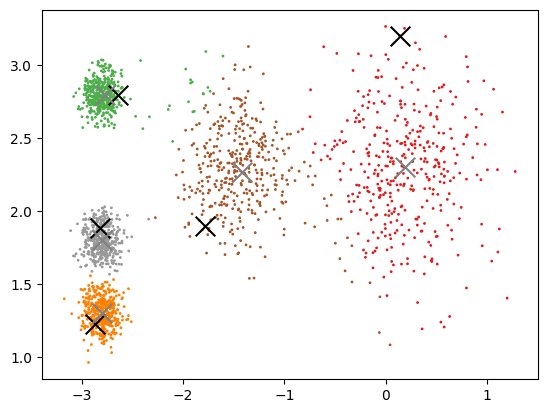

In [168]:
new_centroids = []

for k in range(K):
    new_cluster_points = X[labels == k]
    new_centroid = new_cluster_points.mean(axis=0)
    new_centroids.append(new_centroid)

new_centroids = np.array(new_centroids)

plt.scatter(X[:, 0], X[:, 1], s=1, c=labels, cmap="Set1")
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, marker="x", color="black")
plt.scatter(new_centroids[:, 0], new_centroids[:, 1], s=200, marker="x", color="gray")
plt.show()

In [173]:
def update_centroids(X, labels, K):

	new_centroids = []

	for k in range(K):
		new_cluster_points = X[labels == k]
		new_centroid = new_cluster_points.mean(axis=0)
		new_centroids.append(new_centroid)

	return np.array(new_centroids)

update_centroids(X, labels, K)

array([[ 0.18931119,  2.30267517],
       [-2.77029548,  2.79590129],
       [-2.80407066,  1.30082134],
       [-1.41625168,  2.26403752],
       [-2.80550916,  1.79981542]])

# loop

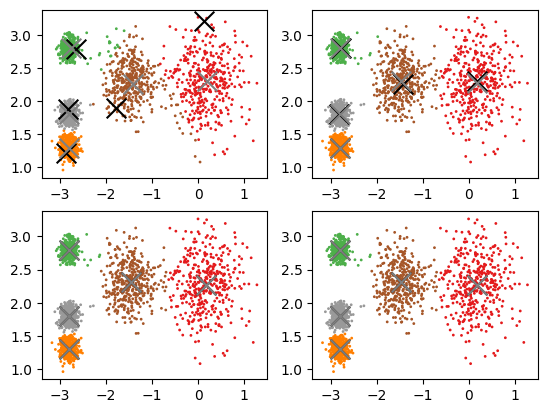

In [176]:
max_iter = 4
centroids = initialize_centroids(X, K)

fig,axs = plt.subplots(2,2)

for i in range(max_iter):
	labels = assign_clusters(X, centroids)
	new_centroids = update_centroids(X, labels, K)

	axs.flatten()[i].scatter(X[:, 0], X[:, 1], s=1, c=labels, cmap="Set1")
	axs.flatten()[i].scatter(centroids[:, 0], centroids[:, 1], s=200, marker="x", color="black")
	axs.flatten()[i].scatter(new_centroids[:, 0], new_centroids[:, 1], s=200, marker="x", color="gray")

	centroids = new_centroids

plt.show()

# class

In [ ]:
from sklearn.metrics import pairwise_distances, pairwise_distances_argmin
import numpy as np

class KMeans_custom:
	def __init__(self, K=5, max_iter=10, random_state=122):
		self.K = K
		self.max_iter = max_iter
		self.rng = np.random.default_rng(seed=random_state) 

		self.centroids = None
		self.labels_ = None
        
	def _initialize_centroids(self, X):
		centroids = self.rng.choice(X, self.K, replace=False, axis=0)
		return centroids
        
	def _assign_clusters(self, X, centroids):
		labels = pairwise_distances_argmin(X,centroids)
		return labels

	def _update_centroids(self, X, labels):

		new_centroids = []

		for k in range(self.K):
			new_cluster_points = X[labels == k]
			new_centroid = new_cluster_points.mean(axis=0)
			new_centroids.append(new_centroid)

		return np.array(new_centroids)

	def fit(self, X):
		X = np.asarray(X)
		self.centroids = self._initialize_centroids(X)

		for _ in range(self.max_iter):
			labels = self._assign_clusters(X, self.centroids)
			new_centroids = self._update_centroids(X, labels)

			self.centroids = new_centroids

		self.labels_ = labels
		return self

	def predict(self, X):
		X = np.asarray(X)

		return pairwise_distances_argmin(X, self.centroids)

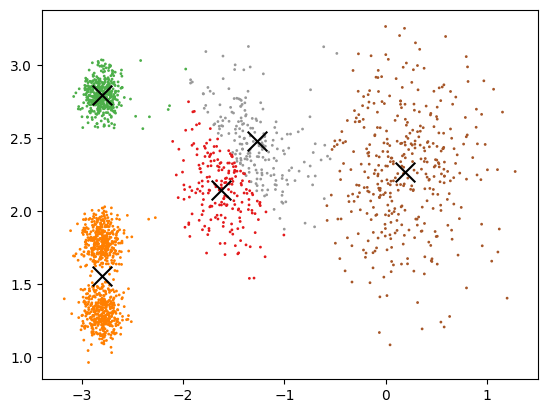

In [184]:
kmeans = KMeans_custom(K=5, random_state=121)
kmeans.fit(X)

plt.scatter(X[:, 0], X[:, 1], s=1, c=kmeans.labels_, cmap="Set1")
plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], s=200, marker="x", color="black")
plt.show()

# sklearn kmeans

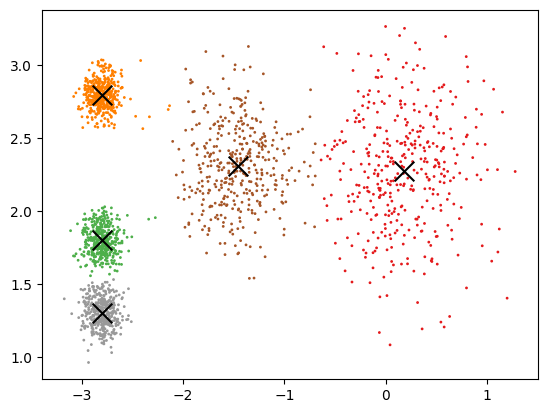

In [190]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)

plt.scatter(X[:, 0], X[:, 1], s=1, c=kmeans.labels_, cmap="Set1")
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, marker="x", color="black")
plt.show()

Kmeans properties: 
- Iterative algorithm
	- the assignment step 
	- the update step 
- Each cluster is represented by a centroid (arithmetic mean of all data points within that cluster)
- Hard Clustering (each data point is assigned to exactly one cluster)
- Nondeterministic, depends on initial centroid placements 
- Converges in a finite number of iterations

Pros:
- Simple
- Efficient
- Fast

Cons:
- Hyperparameter K
- Sensitivity to Initial Centroids
- Assumes Spherical Clusters
- Sensitivity to Outliers (because the centroid is calculated as the mean)
- Not effective in very high-dimensional 

# RBF kernel

In [206]:
kmeans.labels_

array([0, 1, 1, ..., 0, 0, 3], shape=(2000,), dtype=int32)

The **Radial Basis Function (RBF) Kernel**, also known as the **Gaussian Kernel**:

$$K(\mathbf{x}, \mathbf{z}) = \exp\left(-\frac{\|\mathbf{x} - \mathbf{z}\|^2}{2\sigma^2}\right)= \exp\left(-\frac{d(x,z)^2}{2\sigma^2}\right)
$$

Or with parameter $\gamma = \frac{1}{2\sigma^2}$:

$$K(\mathbf{x}, \mathbf{z}) = \exp\left(-\gamma \|\mathbf{x} - \mathbf{z}\|^2\right)= \exp\left(-\gamma \ d(x,z)^2\right)
$$

Properties: 
1. **Similarity Measure**: Returns values in $(0, 1]$
   - $K = 1$ when $\mathbf{x} = \mathbf{z}$ (identical points)
   - $K \to 0$ as $\|\mathbf{x} - \mathbf{z}\| \to \infty$

2. **Radial Symmetry**: Depends only on distance from center


In [204]:
gamma = 1

d = pairwise_distances(X, kmeans.cluster_centers_)
np.exp(-gamma * d**2).round(3)

array([[0.298, 0.   , 0.   , 0.001, 0.   ],
       [0.   , 0.953, 0.549, 0.154, 0.596],
       [0.   , 0.997, 0.364, 0.144, 0.784],
       ...,
       [0.913, 0.001, 0.   , 0.134, 0.   ],
       [0.802, 0.   , 0.   , 0.015, 0.   ],
       [0.145, 0.069, 0.038, 0.835, 0.045]], shape=(2000, 5))

In [205]:
from sklearn.metrics.pairwise import rbf_kernel
gamma = 1
soft_labels = rbf_kernel(X, kmeans.cluster_centers_, gamma=gamma).round(3)
soft_labels

array([[0.298, 0.   , 0.   , 0.001, 0.   ],
       [0.   , 0.953, 0.549, 0.154, 0.596],
       [0.   , 0.997, 0.364, 0.144, 0.784],
       ...,
       [0.913, 0.001, 0.   , 0.134, 0.   ],
       [0.802, 0.   , 0.   , 0.015, 0.   ],
       [0.145, 0.069, 0.038, 0.835, 0.045]], shape=(2000, 5))

In [208]:
soft_labels.argmax(axis=1)

array([0, 1, 1, ..., 0, 0, 3], shape=(2000,))

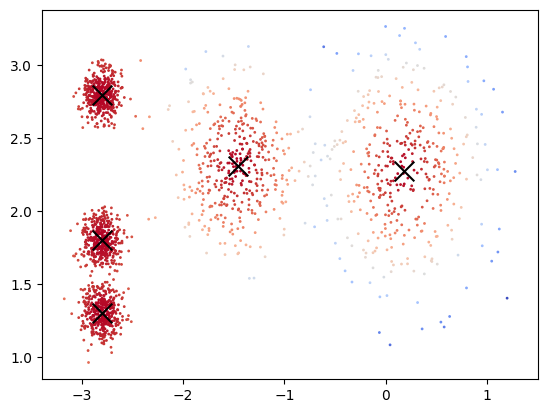

In [220]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)

plt.scatter(X[:, 0], X[:, 1], s=1, c=soft_labels.max(axis=1), cmap="coolwarm")
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, marker="x", color="black")
plt.show()

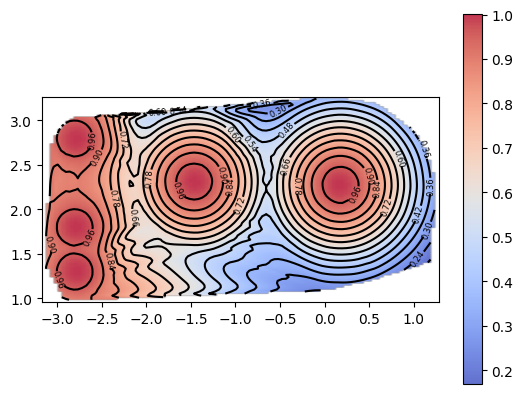

In [255]:
from scipy.interpolate import griddata

xi = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
yi = np.linspace(X[:, 1].min(), X[:, 1].max(), 100)
Xi, Yi = np.meshgrid(xi, yi)

Zi = griddata((X[:, 0], X[:, 1]), soft_labels.max(axis=1), (Xi, Yi), method='cubic')

contours = plt.contour(Xi, Yi, Zi, 15, colors='black')
plt.clabel(contours, inline=True, fontsize=6)
plt.imshow(Zi, 
           extent=[
               X[:, 0].min(), 
               X[:, 0].max(), 
               X[:, 1].min(), 
               X[:, 1].max()
            ], 
           origin='lower',
           cmap='coolwarm', alpha=0.8)
plt.colorbar();